In [19]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data = load_wine(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state = 42)

### 1. k = 1일 때 train dataset에 대한 KNN의 정확도를 제시하고 학습 과정이 올바른지 설명하세요. 만약 올바르지 않다면 이유에 대해서 작성해주세요.

## KNN 모델 학습 과정
#### 숫자 k와 거리 측정 기준 선택
#### 분류하려는 샘플 내 k 개의 최근접 이웃 찾기

In [20]:
#accuracy_score(y_train, y_train_pred)
# weights = uniform / metric = manhattan 일 떄
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=1, metric="manhattan")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

print("정확도:", accuracy_score(y_test, y_test_pred))

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [85]:
#accuracy_score(y_train, y_train_pred)
# weights = distance / metric = manhattan 일 떄
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=1, metric="manhattan")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

print("정확도:", accuracy_score(y_test, y_test_pred))

정확도: 0.8333333333333334


In [84]:
#accuracy_score(y_train, y_train_pred)
# weights = uniform / metric = euclidean 일 떄
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=1, metric="euclidean")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

print("정확도:", accuracy_score(y_test, y_test_pred))

정확도: 0.7777777777777778


In [86]:
#accuracy_score(y_train, y_train_pred)
# weights = distance / metric = euclidean 일 떄
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=1, metric="euclidean")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

print("정확도:", accuracy_score(y_test, y_test_pred))

정확도: 0.7777777777777778


### 학습 과정 결과 설명
##### k의 값이 작을 수록 모델이 매우 복잡해지고 훈련 데이터에 지나치게 민감해지는데, k가 1인 경우 모델은 각 훈련 데이터 포인트를 이웃으로 선택하기에 모델이 훈련 데이터에 과적합되는 경향이 있음. 이는 모델이 훈련 데이터에 지나친 의존과 동시에 새로운 데이터에 대한 일반화가 힘들어지기 때문에 Overfitting 될 가능성이 높음. 따라서 k=1 일 때 학습 과정이 올바르다고 평가하기에는 어려움.

### 2. k가 train dataset의 수와 동일할 때 test dataset에 대한 KNN의 정확도를 제시하고 학습 과정이 올바른지 설명하세요. 만약 올바르지 않다면 이유에 대해서 작성해주세요.

In [89]:
# k = len(X_train)

#accuracy_score(y_test, y_test_pred)

# weights = uniform / metric = manhattan 일 때

knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=len(X_train), metric="manhattan")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)
print("정확도", accuracy_score(y_test, y_test_pred))

정확도 0.3888888888888889


In [88]:
# k = len(X_train)

#accuracy_score(y_test, y_test_pred)

# weights = distance / metric = manhattan 일 때

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=len(X_train), metric="manhattan")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)
print("정확도", accuracy_score(y_test, y_test_pred))

정확도 0.8611111111111112


In [90]:
# k = len(X_train)

#accuracy_score(y_test, y_test_pred)

# weights = uniform / metric = euclidean 일 때

knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=len(X_train), metric="euclidean")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)
print("정확도", accuracy_score(y_test, y_test_pred))

정확도 0.3888888888888889


In [91]:
# k = len(X_train)

#accuracy_score(y_test, y_test_pred)

# weights = distance / metric = euclidean 일 때

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=len(X_train), metric="euclidean")
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)
print("정확도", accuracy_score(y_test, y_test_pred))

정확도 0.7777777777777778


### 학습과정 결과설명
##### k = len(train_dataset)인 경우 모든 훈련 데이터의 포인트를 이웃으로 선택하게 되므로 모델이 훈련 데이터에 완벽하게 적합할 것임. 그러나 새로운 데이터에 대해 전혀 일반화가 불가능하므로 이러한 경우, 모델이 훈련 데이터에만 지나친 의존을 할 것이고 새로운 데이터에 대한 예측 수행 시 제대로 동작하지 않을 것이라고 예상함. 따라서 k=len(train_dataset)일 때 올바른 학습 과정이라고 판단하기 어려움.

### 3. KNN과 Cross validation을 활용하여 1 ~ 50 까지 k에 대한 정확도 변화를 그래프로 시각화하고 가장 높은 정확도를 보이는 k를 찾으세요.
(Cross validation은 5로 고정) 

### KNN만 적용했을 때

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

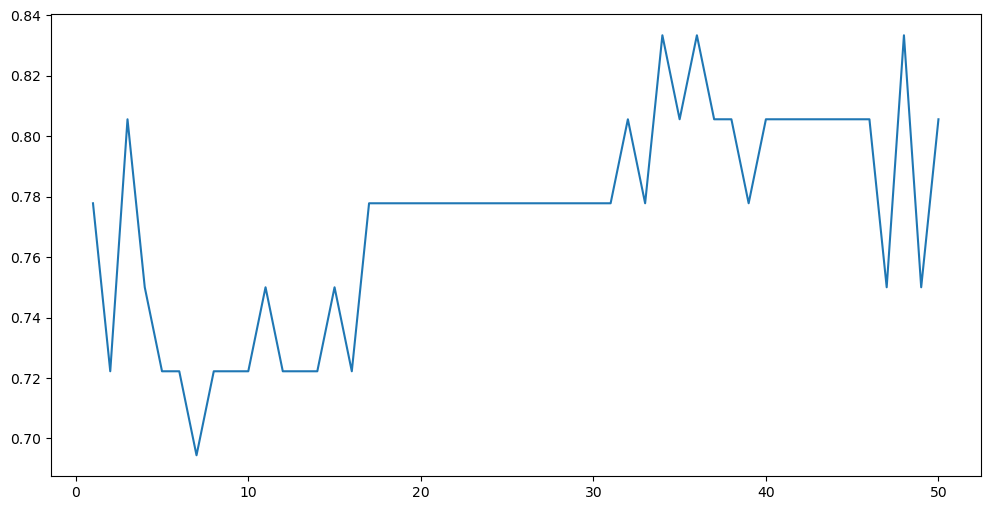

In [112]:
# 가중치가 uniform 일 때
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
acc = []
for k in range(1, 51):
    knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    acc.append(knn_clf.score(X_test, y_test))

plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,51), y=acc)

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

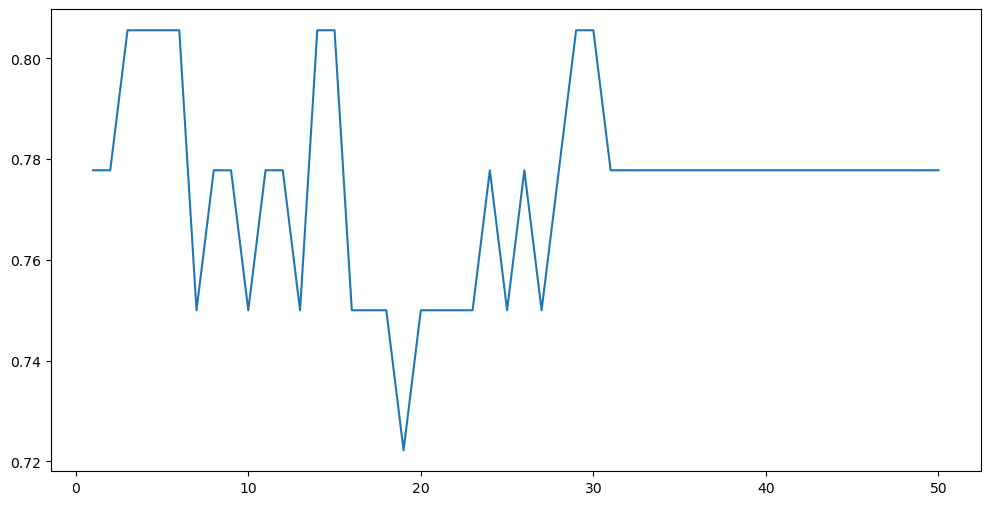

In [113]:
# 가중치가 distance일 때
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
acc = []
for k in range(1, 51):
    knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    acc.append(knn_clf.score(X_test, y_test))

plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,51), y=acc)

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'acc')

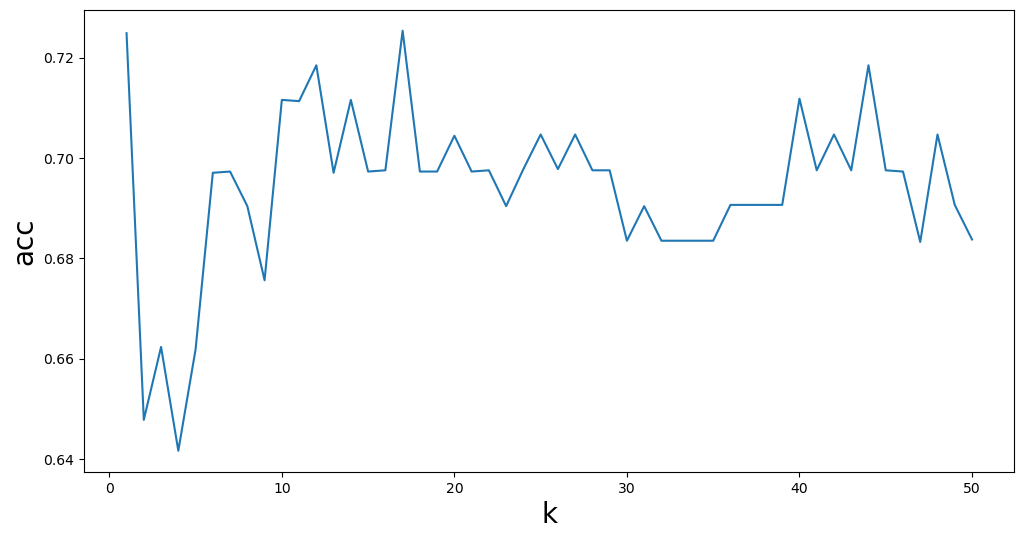

In [131]:
# 가중치가 uniform 일 때
from sklearn.model_selection import cross_val_score

acc = []
for k in range(1, 51):
    knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=k)
    score = cross_val_score(knn_clf, X_train, y_train, cv=5)
    acc.append(score.mean())

plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,51), y=acc)
plt.xlabel("k", fontsize=20)
plt.ylabel("acc", fontsize=20)

In [132]:
# Cross Validation을 적용하고 가중치가 uniform인 acc에서 k=17일 때 가장 높은 정확도를 보임.
acc.index(max(acc))
print(max(acc))

0.7253694581280788


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'acc')

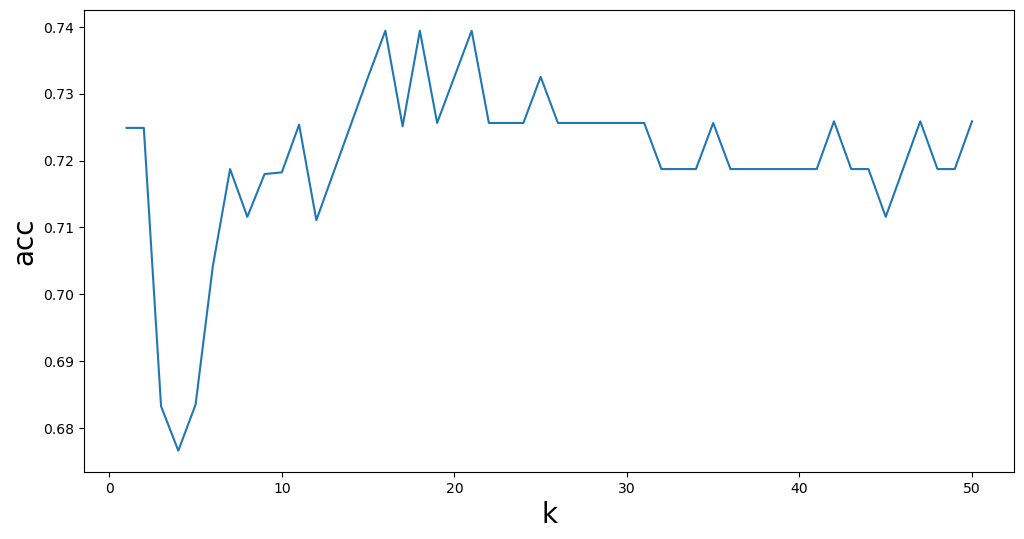

In [120]:
# 가중치가 distance 일 때
from sklearn.model_selection import cross_val_score

acc = []
for k in range(1, 51):
    knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k)
    score = cross_val_score(knn_clf, X_train, y_train, cv=5)
    acc.append(score.mean())

plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,51), y=acc)
plt.xlabel("k", fontsize=20)
plt.ylabel("acc", fontsize=20)

In [126]:
# Cross Validation을 적용하고 가중치가 distance인 acc에서 k=17~20일 때 가장 높은 정확도를 보임.
acc.index(max(acc))
print(max(acc))

0.7394088669950738


### 4. 문제3에서 찾은 k와 KNN의 하이퍼 파라미터(weight, metric), scaler 등을 조절하여 최고의 성능을 제시하세요.
(Cross validation의 수는 5로 고정)

#### 가중치는 distance, metric은 manhattan일 때 성능이 제일 좋았으므로, distance에서 가장 높은 정확도를 보였던 k=17~20을 사용

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()
knn = KNeighborsClassifier(weights='distance', n_neighbors=17, metric='manhattan')

In [148]:
# 교차 검증을 통해 얻은 평균 정확도를 출력
# 모델의 성능 평가
knn_cv = cross_val_score(knn, data.data, data.target, cv=5)
knn_cv.mean()

0.7760317460317461

#### 교차 검증을 통해 얻은 평균 정확도는 77.6%